# **Introducción**

El presente notebook tiene como objetivo analizar el data set del diagnóstico de cáncer de mama en Wisconsin. Tal data set cuenta con 699 registros y 10 atributos que son de vital importancia para determinar si el cáncer tiene un diagnóstico de benigno o maligno, por ello, es un problema de clasificación binomial porque cuenta con solo dos clases objetivo: ¿es benigno o es maligno?

In [1]:
# Se cargan las librerías a utilizar
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
x = breast_cancer_wisconsin_original.data.features
Y_1 = breast_cancer_wisconsin_original.data.targets.Class

# Crear un DataFrame combinando x y Y_1
df = pd.DataFrame(data=x)
df['Class'] = Y_1

# Visualizar el DataFrame resultante
print(df.head())

   Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
0                  1                            2          1.0   
1                  5                            7         10.0   
2                  1                            2          2.0   
3                  1                            3          4.0   
4                  3                            2          1.0   

   Bland_chromatin  Normal_nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3                2        1      2  
2 

1. Sample code number (Número de código de muestra):            id number   
2. Clump Thickness (Espesor del grumo):               1 - 10
3. Uniformity of Cell Size (Uniformidad del tamaño de celda):       1 - 10
4. Uniformity of Cell Shape (Uniformidad de la forma de la celda):      1 - 10
5. Marginal Adhesion (Adhesión marginal):             1 - 10
6. Single Epithelial Cell Size (Tamaño de célula epitelial única):   1 - 10
7. Bare Nuclei (Núcleos desnudos):                   1 - 10
8. Bland Chromatin (Cromatina suave):               1 - 10
9. Normal Nucleoli (Nucléolos normales):               1 - 10
10. Mitoses Mitosis:                       1 - 10
11. Class:                        (2 for benign, 4 for malignant) (2 para benignos, 4 para malignos)


In [3]:
df.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [4]:
#Cuál es el número de registros?
#Cuál es el número de atributos?
print('la base de datos contiene 699 registros y 10 atributos',df.shape)

la base de datos contiene 699 registros y 10 atributos (699, 10)


In [5]:
#Cual es el tipo de los atributos?
df.dtypes

Clump_thickness                  int64
Uniformity_of_cell_size          int64
Uniformity_of_cell_shape         int64
Marginal_adhesion                int64
Single_epithelial_cell_size      int64
Bare_nuclei                    float64
Bland_chromatin                  int64
Normal_nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [6]:
#Medida de centralidad y desviación para atributos numéricos:
df.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


<ipython-input-7-a6a32cba8b3b>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


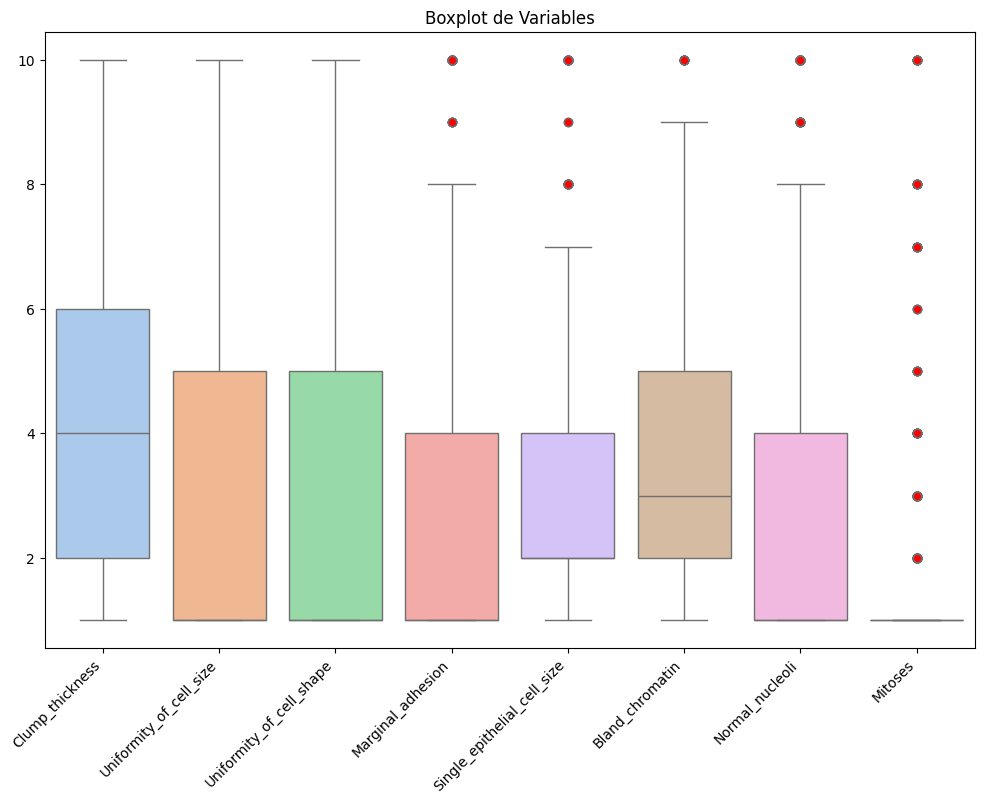

In [7]:
#Diagrama de cajas y bigotes para atributos numéricos
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=df.drop(["Bare_nuclei","Class"], axis=1),palette="pastel",flierprops=dict(markerfacecolor='red', marker='o'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Boxplot de Variables")
plt.show()


La imagen muestra un boxplot de las variables utilizadas para clasificar el cáncer de cuello uterino. El boxplot muestra la distribución de los datos para cada variable.

En general, se puede inferir de la imagen que las variables Clump_thickness, Uniformity_of_cell_size, Uniformity_of_cell_shape, Marginal_adhesion y Single_epithelial_cell_size son las más importantes para la clasificación del cáncer de cuello uterino. Estas variables tienen una distribución más dispersa que las otras variables, lo que indica que tienen una mayor variabilida

In [8]:
#Medida de centralidad para atributos categóricos:
df['Bare_nuclei'].mode()

0    1.0
Name: Bare_nuclei, dtype: float64

In [9]:
# Correlación entre los atributos de entrada numéricos
# Permite detectar si hay atributos redundantes (correlación mayor a 0.85 o menor a -0.85)
df.corr()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
Clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.593091,0.558428,0.535835,0.350034,0.716001
Uniformity_of_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.691709,0.755721,0.722865,0.458693,0.817904
Uniformity_of_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.713878,0.735948,0.719446,0.438911,0.818934
Marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.670648,0.666715,0.603352,0.417633,0.696800
Single_epithelial_cell_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.585716,0.616102,0.628881,0.479101,0.682785
Bare_nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.680615,1.000000,0.665878,0.344169,0.756616
Normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.584280,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.339210,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.822696,0.756616,0.712244,0.423170,1.000000


In [10]:
# Cual es el máximo de datos faltantes en un mismo registro?
# Si hay registros a los que les faltan muchos valores, es mejor eliminarlos.
max(df.isnull().sum(axis=1))

1

In [11]:
#Cuantos datos faltantes hay por cada atributo?
df.isnull().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

El único atributo que contiene datos faltantes es Bare_nuclei

In [12]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?
print(df['Class'].value_counts())

2    458
4    241
Name: Class, dtype: int64


La data contiene para el atributo Class la siguiente distribución 248 registros para la clasificación benignos y 241 registros para la clasificación no benignos. Esto puede generar un sesgo al momento de aplicar el modelo, por lo tanto, será necesario el balanceo.

Etapa 2: Preparación de los datos

In [13]:
#reemplazamos los valores faltantes de la variable Bare_nuclei por su valor de la moda.
df["Bare_nuclei"].fillna("1.0", inplace = True)

In [14]:
#Comprobamos que ya no exista valores faltantes en Bare_nuclei.
df.isnull().sum()

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [15]:
# Se hace balanceo de clases eliminando ejemplos de la clase mayoritaria
g = df.groupby('Class')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
dataBal

Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
Class                                                                           
2     0                  4                        1                         1   
      1                  5                        1                         1   
      2                  1                        1                         1   
      3                  1                        1                         1   
      4                  2                        1                         1   
...                    ...                      ...                       ...   
4     236                8                        2                         3   
      237               10                        8                         4   
      238                4                        8                         7   
      239                5                        8                         7   
      240               10                        3                         3   

           Marginal_adhesion  Single_epithelial_cell_size Bare_nuclei  \
Class                                                                   
2     0                    1                            2         1.0   
      1                    1                            2         1.0   
      2                    1                            2         1.0   
      3                    2                            1         1.0   
      4                    2                            2         1.0   
...                      ...                          ...         ...   
4     236                  1                            6         3.0   
      237                  4                            4        10.0   
      238                 10                            4        10.0   
      239                  7                           10        10.0   
      240                  1                            2        10.0   

           Bland_chromatin  Normal_nucleoli  Mitoses  Class  
Class                                                        
2     0                  1                1        1      2  
      1                  1                1        1      2  
      2                  2                1        1      2  
      3                  1                1        1      2  
      4                  3                1        1      2  
...                    ...              ...      ...    ...  
4     236                7                1        1      4  
      237                3               10        4      4  
      238                7                5        1      4  
      239                5                7        1      4  
      240                7                6        1      4  

[482 rows x 10 columns]

In [16]:
# Se verifica que haya quedado el mismo número de registros por cada Class
print(dataBal['Class'].value_counts())

2    241
4    241
Name: Class, dtype: int64


Etapa 3: Modelado

In [17]:
# se divide el conjunto de datos en conjuntos de entrenamiento y test
from sklearn.model_selection import train_test_split
#Establecemos una semilla
semilla = 42
# Dividimos los datos con la semilla especificada
X_train, X_test, y_train, y_test = train_test_split(dataBal.drop('Class', axis=1), dataBal.Class, test_size=0.30,random_state=semilla)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(337, 9) (337,)
(145, 9) (145,)


In [18]:
# Entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=500, tol=0.01)

In [19]:
# Aplicación del modelo construido a los datos de test
predictions = logisticRegr.predict(X_test)
predictions

array([4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 4,
       2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4,
       2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 4, 4,
       2, 4, 4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4,
       4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4])

In [20]:
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

print("El modelo clasifica correctamente el",accuracy_score(y_test, predictions))

El modelo clasifica correctamente el 0.9655172413793104


# **Conclusión**

Un accuracy del 0.9655 en el modelo de regresión logística significa que el modelo clasifica correctamente el 96.55% de las muestras del conjunto de datos. En el contexto del diagnóstico de cáncer de mama, donde la variable objetivo "Class" tiene dos categorías (benigno y maligno), esto implica que el modelo acierta en la clasificación de los casos en aproximadamente el 96.55% de las ocasiones.

Es importante considerar la interpretación específica para el diagnóstico de cáncer de mama:

Categorías de la variable objetivo:

* 2 (benigno): Implica que el modelo predijo correctamente que el caso es benigno en el 96.55% de las ocasiones.
* 4 (maligno): Implica que el modelo predijo correctamente que el caso es maligno en el 96.55% de las ocasiones.

Errores de clasificación:

Un accuracy del 96.55% indica que, en general, el modelo se comporta muy bien. Sin embargo, aún puede haber casos en los que se equivoque en la clasificación.
En resumen, un accuracy del 96.55% es un buen indicador general del rendimiento del modelo, pero es útil considerar otras métricas y realizar una evaluación más detallada, especialmente en problemas médicos críticos como el diagnóstico de cáncer de mama.
